In [2]:
import os
os.environ['LD_LIBRARY_PATH'] = '/usr/lib/wsl/lib'

In [3]:
from karabo.imaging.imager import Imager
from karabo.simulation.telescope import Telescope
from karabo.simulation.observation import Observation, ObservationLong
from karabo.simulation.interferometer import InterferometerSimulation
from karabo.simulation.sky_model import SkyModel
from karabo.sourcedetection.result import SourceDetectionResult, PyBDSFSourceDetectionResult
from karabo.sourcedetection.evaluation import SourceDetectionEvaluation
import numpy as np
import matplotlib.pyplot as plt
# Render plots inline
%matplotlib inline

The RASCIL data directory is not available - continuing but any simulations will fail


In [1]:
def create_random_sources(num_sources, ranges):
    """
    Create a random set of sources.

    :param num_sources: number of sources to create
    :param ranges: list of ranges for each parameter. 
    
    Description of ranges:

    - [0] right ascension (deg)-
    - [1] declination (deg)
    - [2] stokes I Flux (Jy)
    - [3] stokes Q Flux (Jy): defaults to 0
    - [4] stokes U Flux (Jy): defaults to 0
    - [5] stokes V Flux (Jy): defaults to 0
    - [6] reference_frequency (Hz): defaults to 0
    - [7] spectral index (N/A): defaults to 0
    - [8] rotation measure (rad / m^2): defaults to 0
    - [9] major axis FWHM (arcsec): defaults to 0
    - [10] minor axis FWHM (arcsec): defaults to 0
    - [11] position angle (deg): defaults to 0
    - [12] source id (object): defaults to None
    """

    sources = np.column_stack(
        (
            np.random.uniform(min_val, max_val, num_sources)
            for min_val, max_val in ranges
        )
    )

    return sources


/tmp/ipykernel_1122/1059202742.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  sources = np.column_stack(


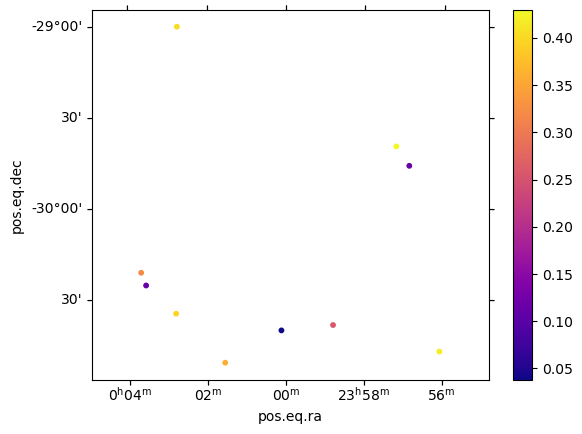

In [6]:
sky = SkyModel()
sky_data = create_random_sources(10, [[-1, 1], [-29, -31], [1, 3], [0, 2], [0, 2], [0, 2], [100.0e6, 100.0e6], [-0.7, -0.7], [0.0, 0.0], [0, 600], [50, 50], [45, 45]])
sky.add_point_sources(sky_data)
sky.explore_sky([0, -30], s=10)

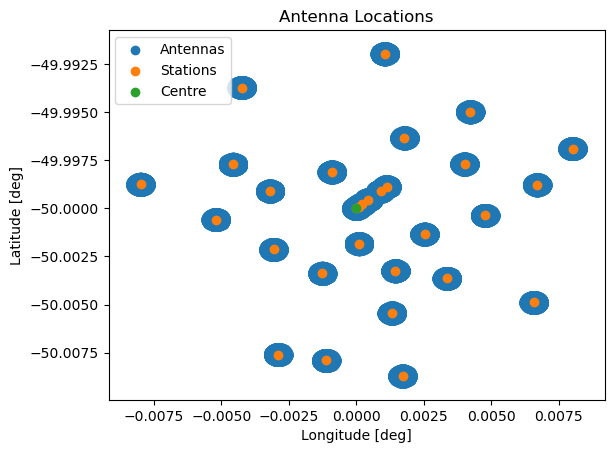

In [7]:
telescope = Telescope.get_OSKAR_Example_Telescope()
telescope.plot_telescope()

In [9]:
observation_settings = ObservationLong(
    # length=4 hours
    start_frequency_hz=100e5,
    phase_centre_ra_deg=0,
    phase_centre_dec_deg=-30,
    number_of_channels=100000,
    number_of_time_steps=10, # Integration time?
    number_of_days=2,
)

interferometer_sim = InterferometerSimulation(channel_bandwidth_hz=1e6, vis_path='./data/visibilities.ms')
visibility_askap = interferometer_sim.run_simulation(telescope, sky, observation_settings)

use_gpu is None, using is_cuda_available() to set use_gpu to True
Some example files to remove/replace:
['./data/visibilities.ms/beam_vis_0.vis']
Removed 1 file(s) matching the glob pattern "beam_vis_*.vis" and "beam_vis_*.ms"!
Observing Day: 0 the 2023-01-31 08:57:25.011253
./data/visibilities.ms/beam_vis_0.vis


In [ ]:
imaging_npixel = 2048
imaging_cellsize = 3.878509448876288e-05

In [ ]:
imager_askap = Imager(
    visibility_askap,
    imaging_npixel = imaging_npixel,
    imaging_cellsize = imaging_cellsize,
)
dirty = imager_askap.get_dirty_image()
dirty.plot(title='Dirty image')